# Hierarchical Clustering Validation Metrics Visualization

This notebook loads validation metrics from the hierarchical clustering analysis and creates publication-quality figures.

## 1. Import Required Libraries

In [31]:
import os
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set up plotting environment
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2. Load Metrics Data

In [32]:
# Define paths
data_dir = "./data"
metrics_file = op.join(data_dir, "combined_validation_metrics.csv")

# Load the combined metrics
df = pd.read_csv(metrics_file)

# Display the data
print(f"Loaded metrics for k values: {df['k'].tolist()}")
print(f"\nAvailable metrics: {df.columns.tolist()}")
print(f"\nData preview:")
df.head(10)

Loaded metrics for k values: [2, 3, 4, 5, 6, 7, 8, 9]

Available metrics: ['k', 'silhouette_score', 'gap_statistic', 'gap_std', 'vrc', 'wcss', 'bcss', 'total_ss', 'cluster_separation', 'hierarchy_index', 'cophenetic_correlation', 'group_sizes']

Data preview:


,k,silhouette_score,gap_statistic,gap_std,vrc,wcss,bcss,total_ss,cluster_separation,hierarchy_index,cophenetic_correlation,group_sizes
0,2,0.007000,2.175489,0.000095,5.969058,698.605957,5.931749,704.537706,0.185290,0.931444,NaN,"[303, 402]"
1,3,0.005079,2.181402,0.000076,5.607236,693.460861,11.078060,704.538921,0.220144,0.943879,NaN,"[303, 205, 197]"
2,4,0.004584,2.186725,0.000088,5.355063,688.754318,15.784549,704.538867,0.246170,0.932425,NaN,"[155, 148, 205, 197]"
3,5,0.002931,2.190896,0.000079,5.028212,684.860855,19.677859,704.538714,0.282191,0.931151,NaN,"[155, 148, 205, 65, 132]"
4,6,0.002663,2.194295,0.000095,4.723339,681.512611,23.025861,704.538472,0.298260,0.925579,NaN,"[155, 148, 58, 147, 65, 132]"
5,7,0.001468,2.196852,0.000101,4.414490,678.780876,25.757632,704.538508,0.312655,0.936161,NaN,"[155, 83, 65, 58, 147, 65, 132]"
6,8,0.001046,2.199292,0.000106,4.186927,676.108418,28.430006,704.538423,0.328761,0.938704,NaN,"[155, 83, 65, 58, 147, 65, 39, 93]"
7,9,0.001373,2.201426,0.000086,3.985582,673.676479,30.861983,704.538462,0.332063,0.944186,NaN,"[53, 102, 83, 65, 58, 147, 65, 39, 93]"


## 3. Configure Plot Settings

Set up publication-quality plotting parameters.

In [33]:
# Set publication-quality defaults
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# Matplotlib parameters
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
rcParams['font.size'] = 11
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 13
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['figure.titlesize'] = 14

# Define color palette
colors = {
    'silhouette': '#2E86AB',
    'gap': '#A23B72',
    'vrc': '#F18F01',
    'separation': '#C73E1D',
    'hierarchy': '#6A994E'
}

# Create output directory for figures
figures_dir = "./figures"
os.makedirs(figures_dir, exist_ok=True)
print(f"Figures will be saved to: {figures_dir}")

Figures will be saved to: ./figures


## 4. Create Individual Metric Plots

Create separate, customizable plots for each validation metric.

### 4.1 Silhouette Score

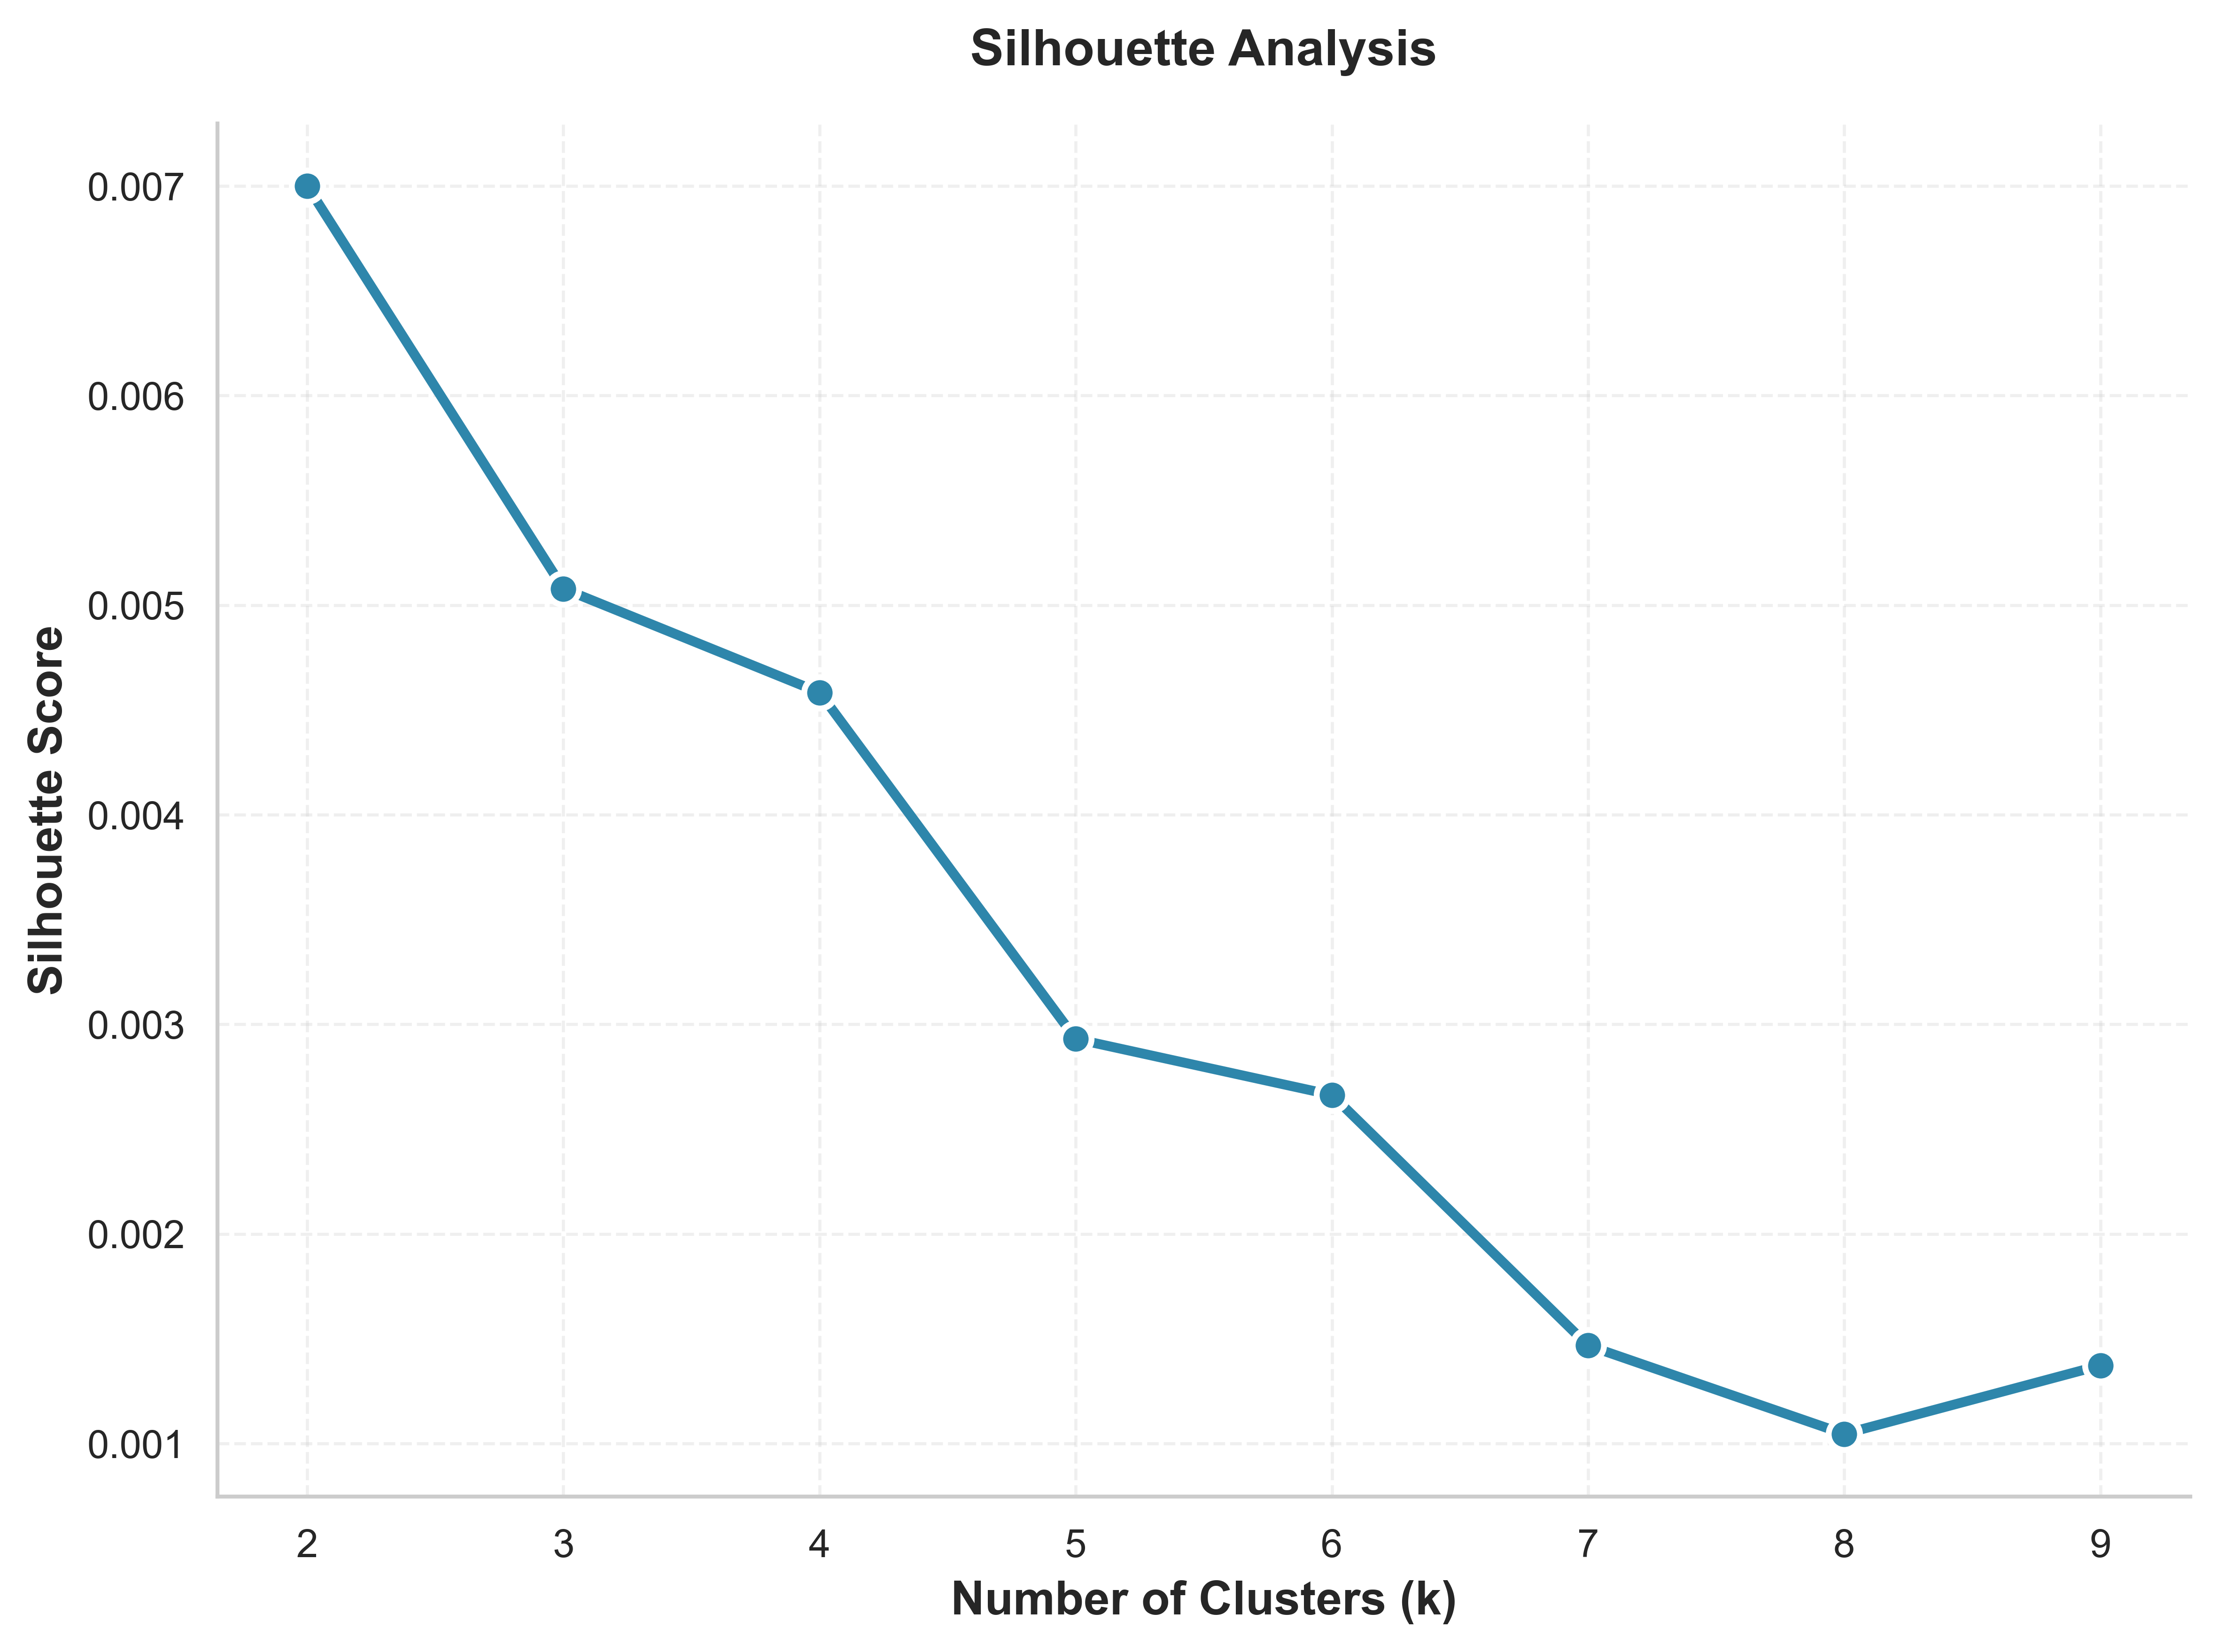

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data
ax.plot(df['k'], df['silhouette_score'], 'o-', 
        linewidth=2.5, markersize=8, color=colors['silhouette'],
        markeredgecolor='white', markeredgewidth=1.5)


# Styling
ax.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax.set_ylabel('Silhouette Score', fontweight='bold')
ax.set_title('Silhouette Analysis', fontweight='bold', pad=15)
ax.set_xticks(df['k'])
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### 4.2 Gap Statistic

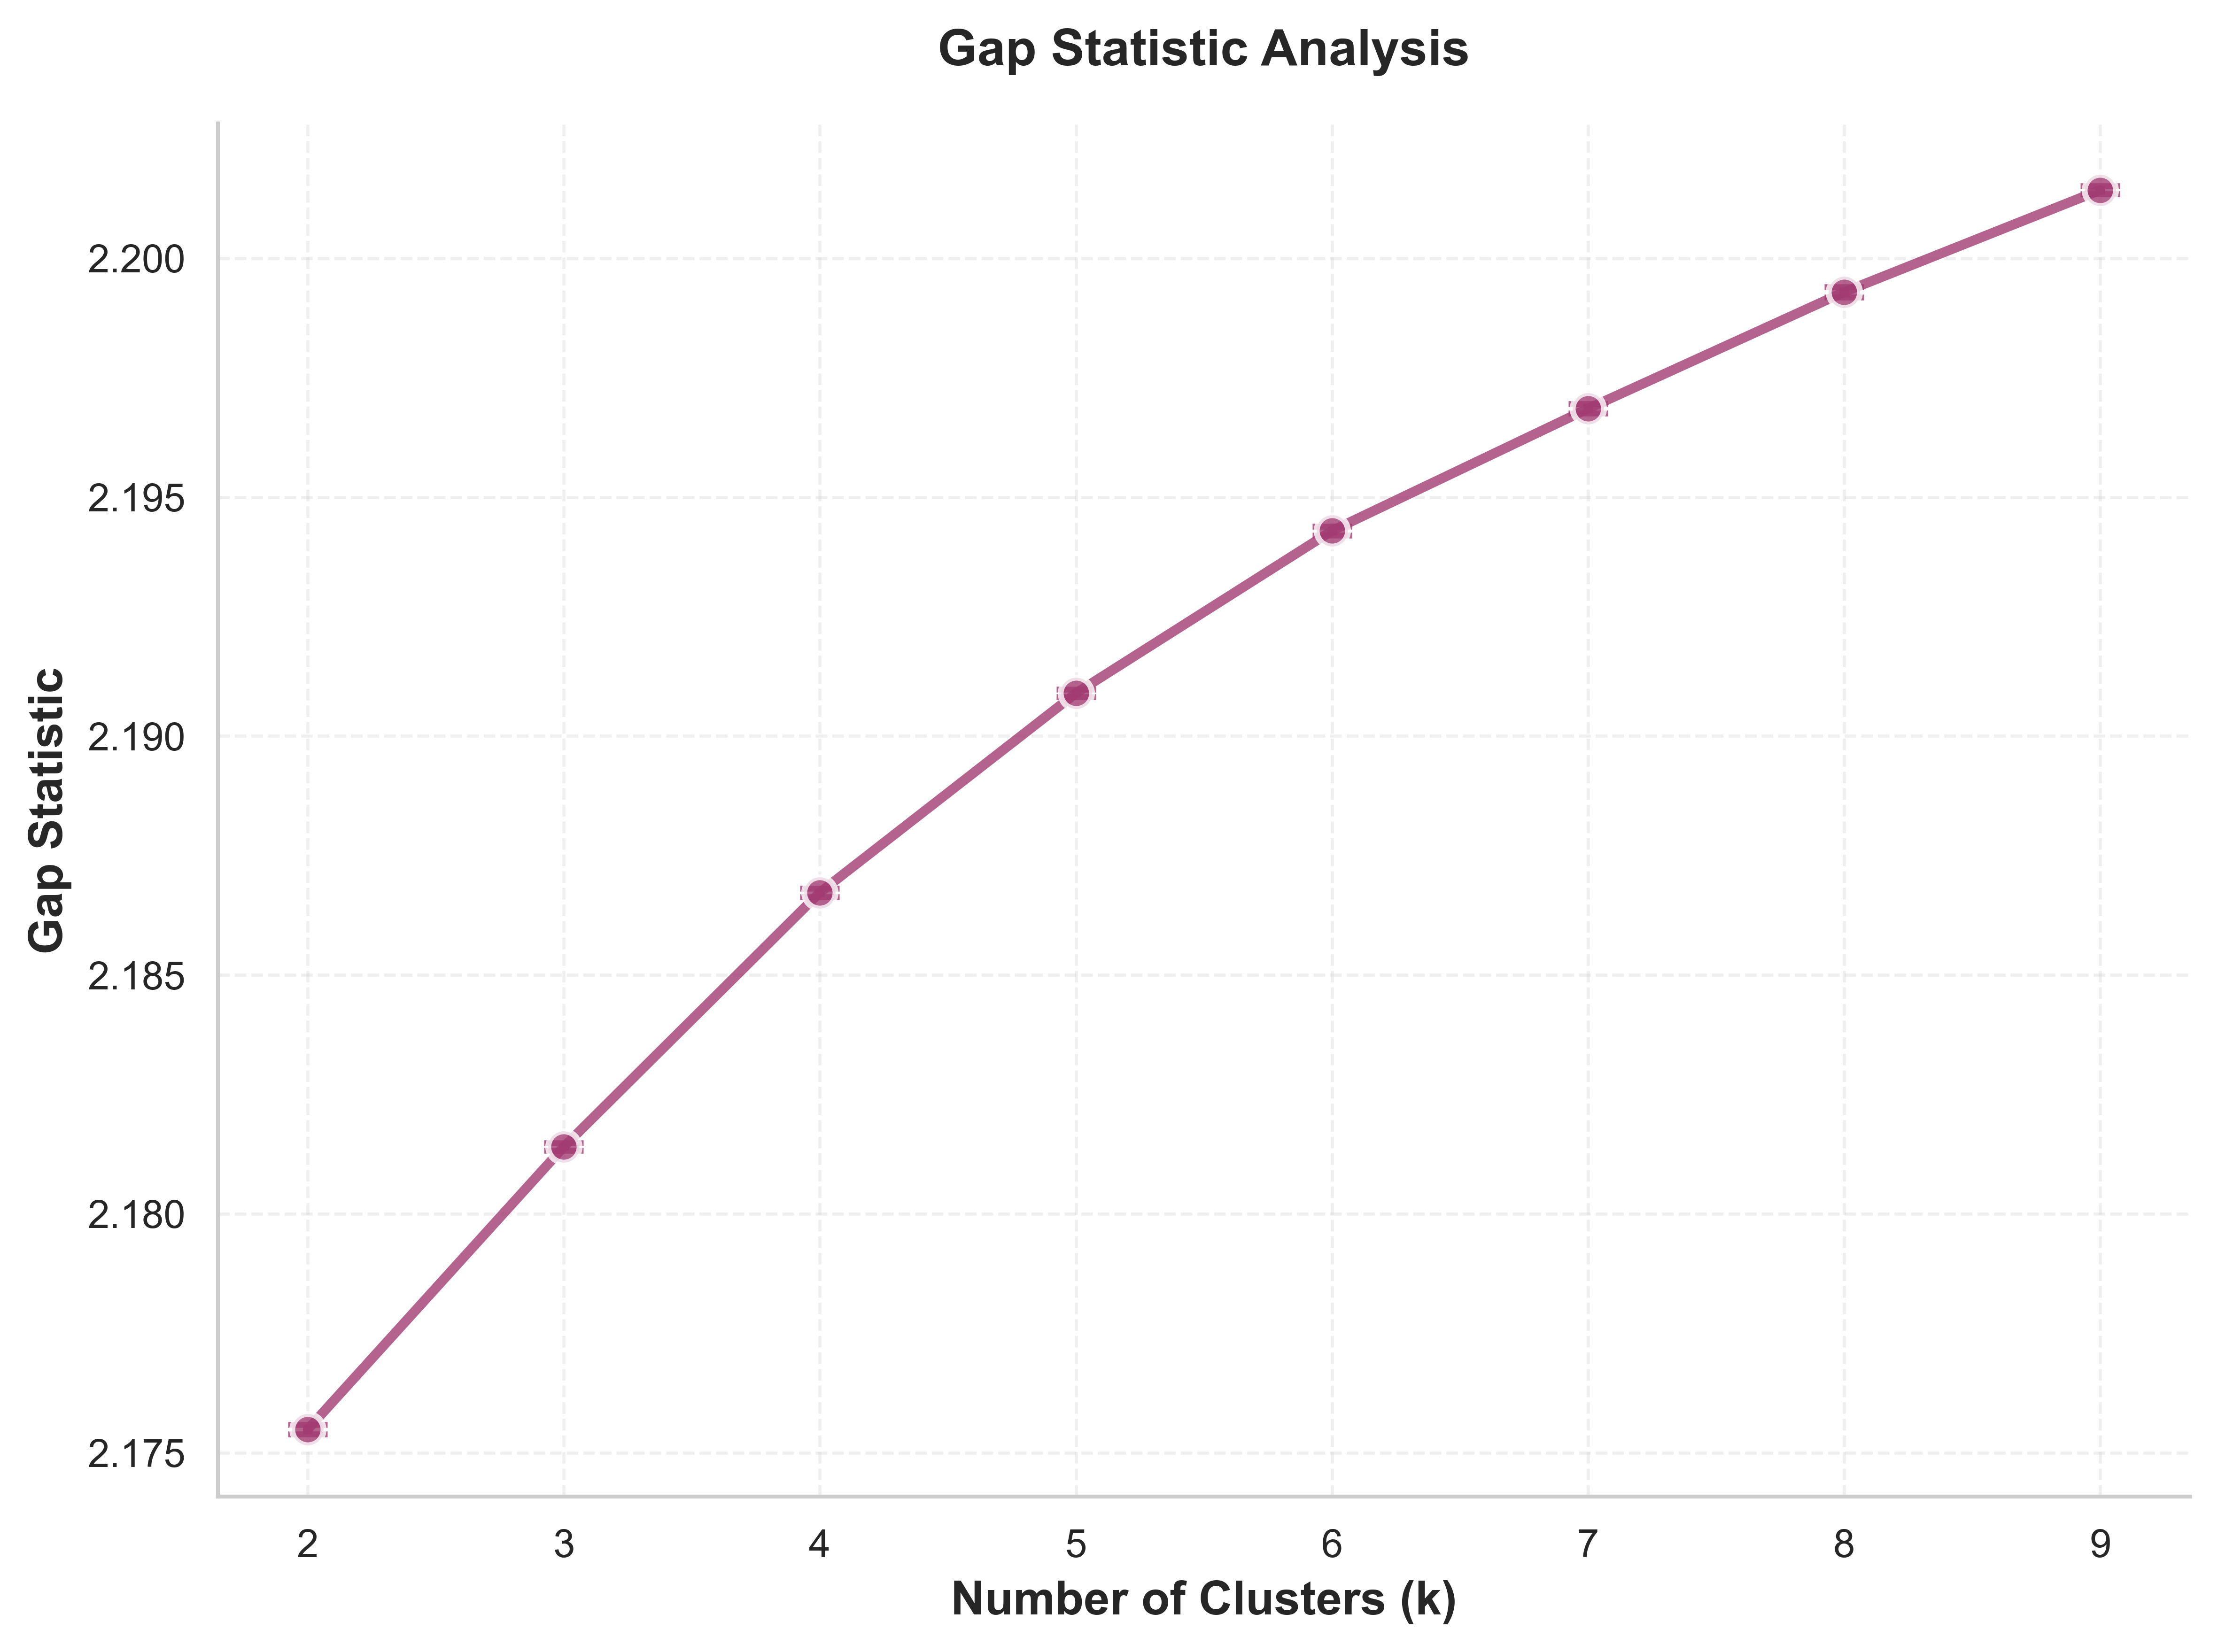

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot with error bars
ax.errorbar(df['k'], df['gap_statistic'], yerr=df['gap_std'],
            fmt='o-', linewidth=2.5, markersize=8, 
            color=colors['gap'], capsize=5, capthick=2,
            markeredgecolor='white', markeredgewidth=1.5,
            ecolor=colors['gap'], alpha=0.8)


# Styling
ax.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax.set_ylabel('Gap Statistic', fontweight='bold')
ax.set_title('Gap Statistic Analysis', fontweight='bold', pad=15)
ax.set_xticks(df['k'])
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### 4.3 Variance Ratio Criterion (VRC)

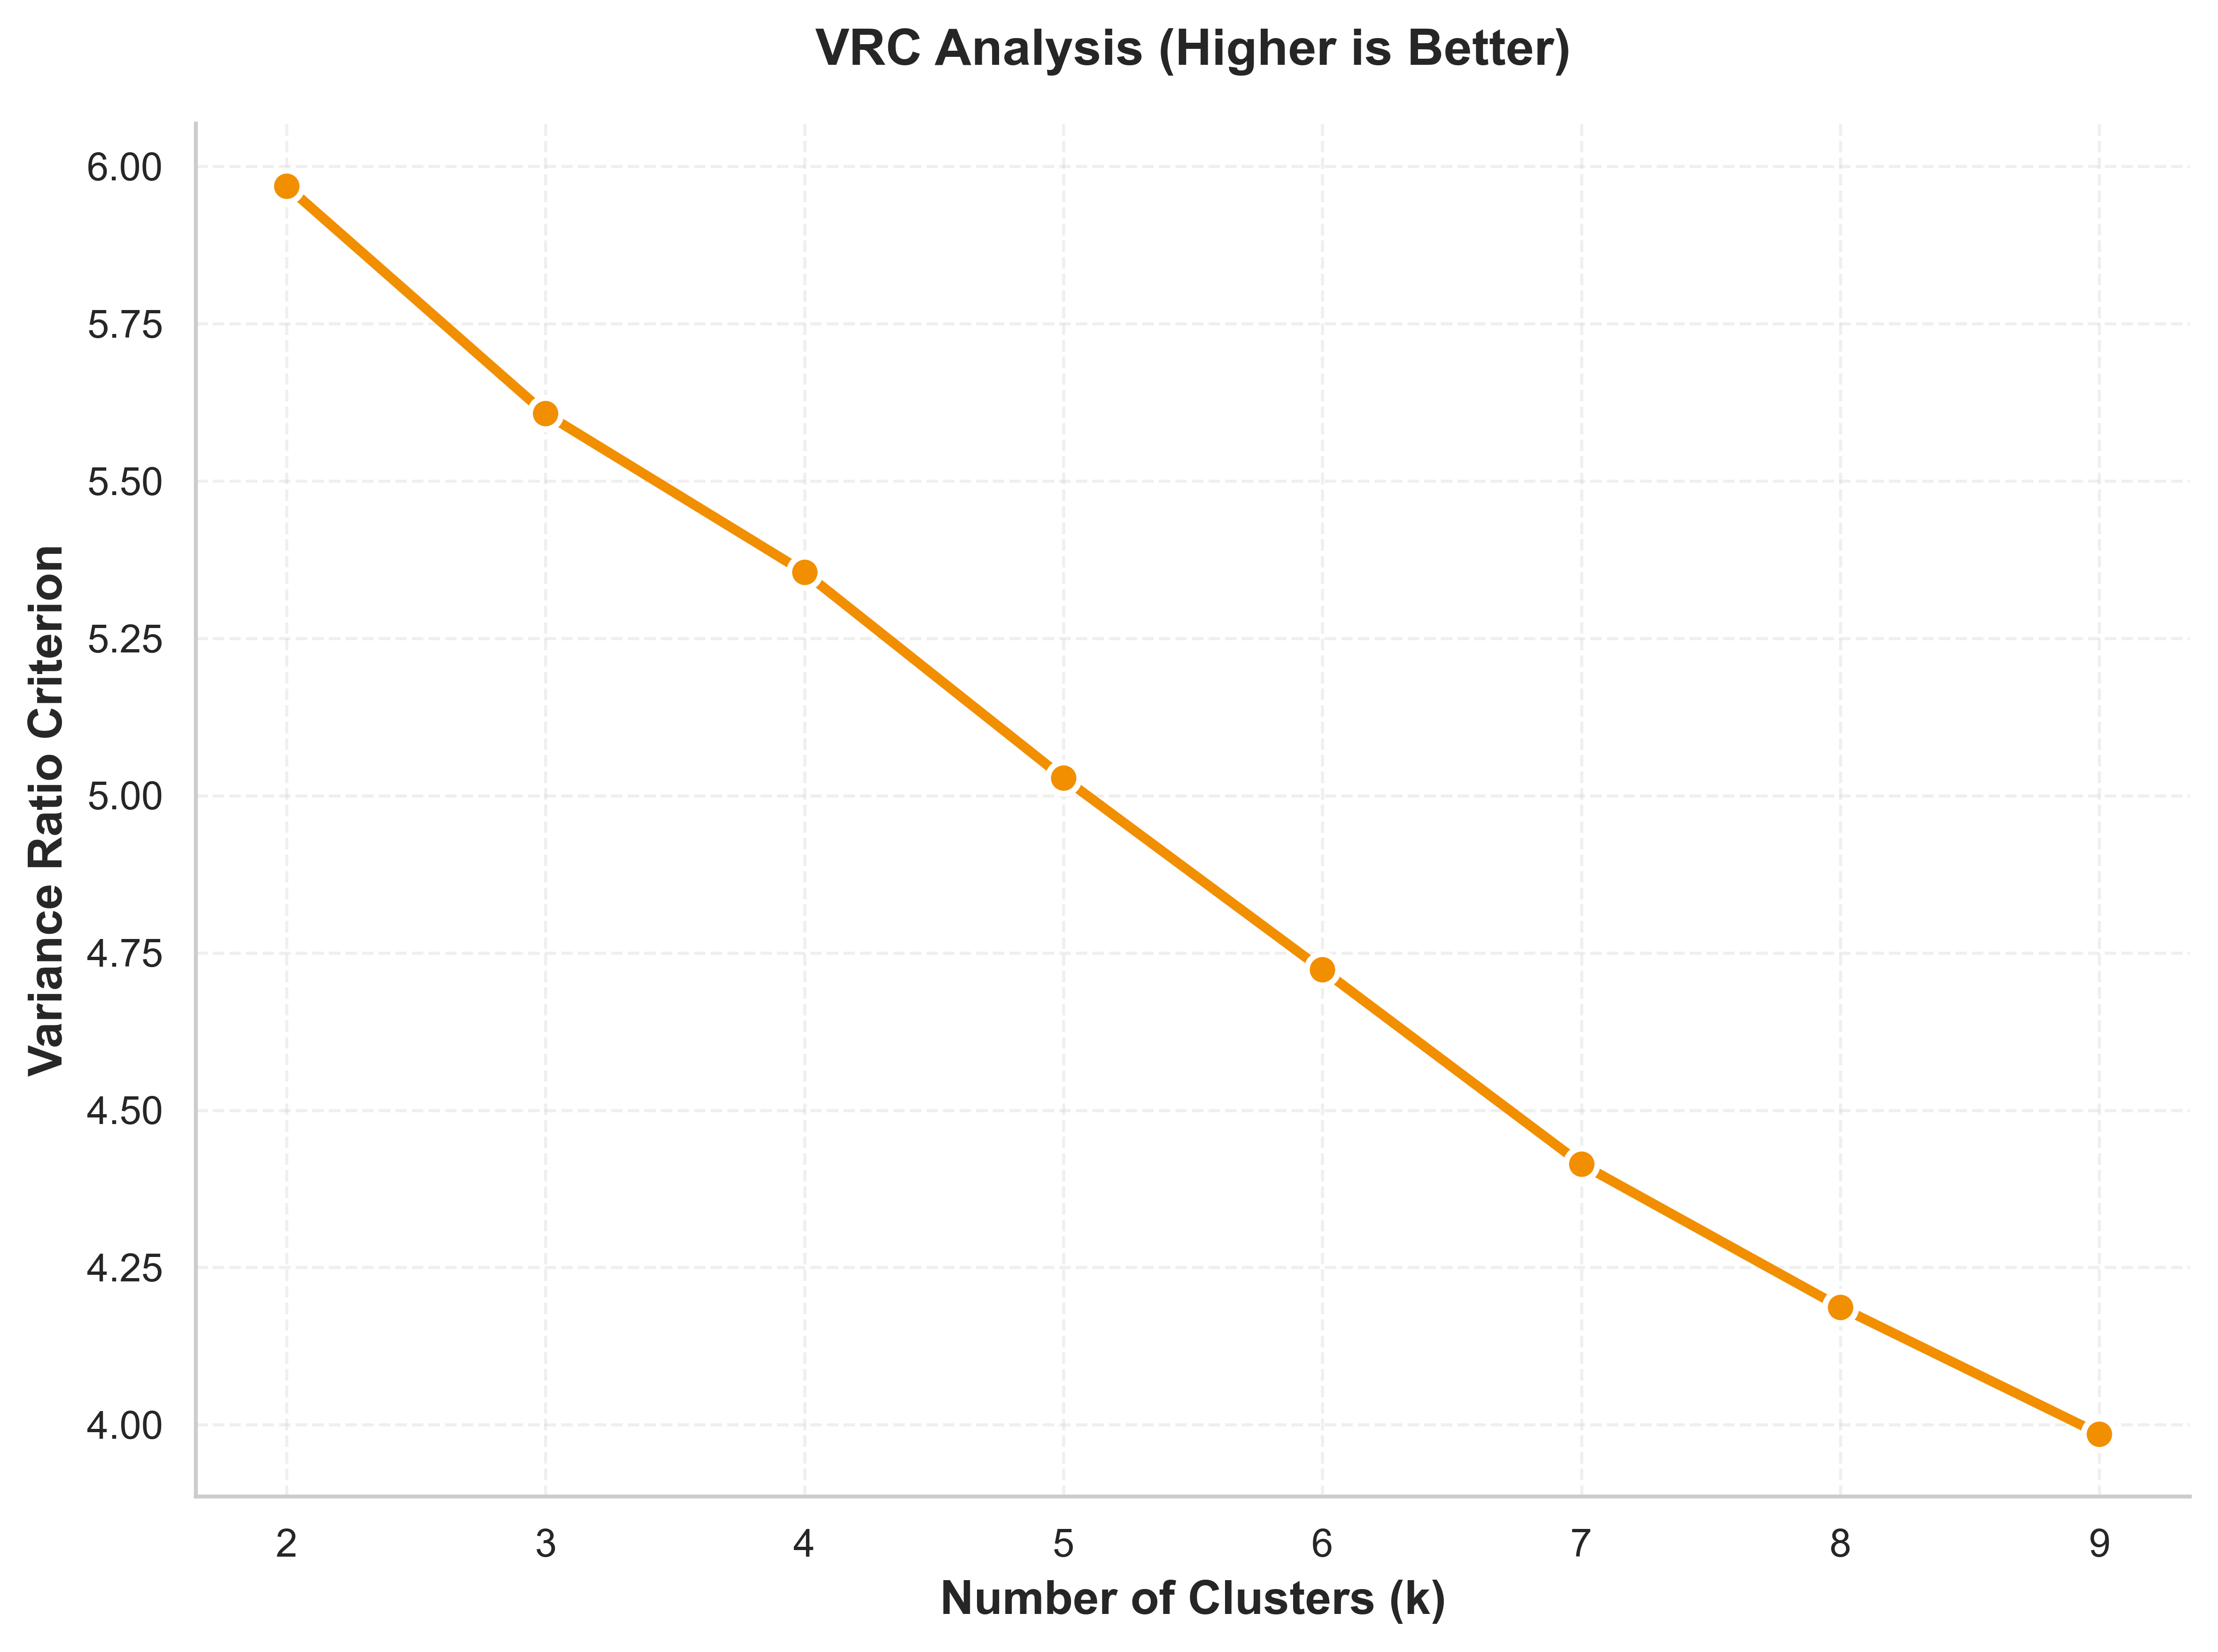

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data
ax.plot(df['k'], df['vrc'], 'o-', 
        linewidth=2.5, markersize=8, color=colors['vrc'],
        markeredgecolor='white', markeredgewidth=1.5)


# Styling
ax.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax.set_ylabel('Variance Ratio Criterion', fontweight='bold')
ax.set_title('VRC Analysis (Higher is Better)', fontweight='bold', pad=15)
ax.set_xticks(df['k'])
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### 4.4 Cluster Separation

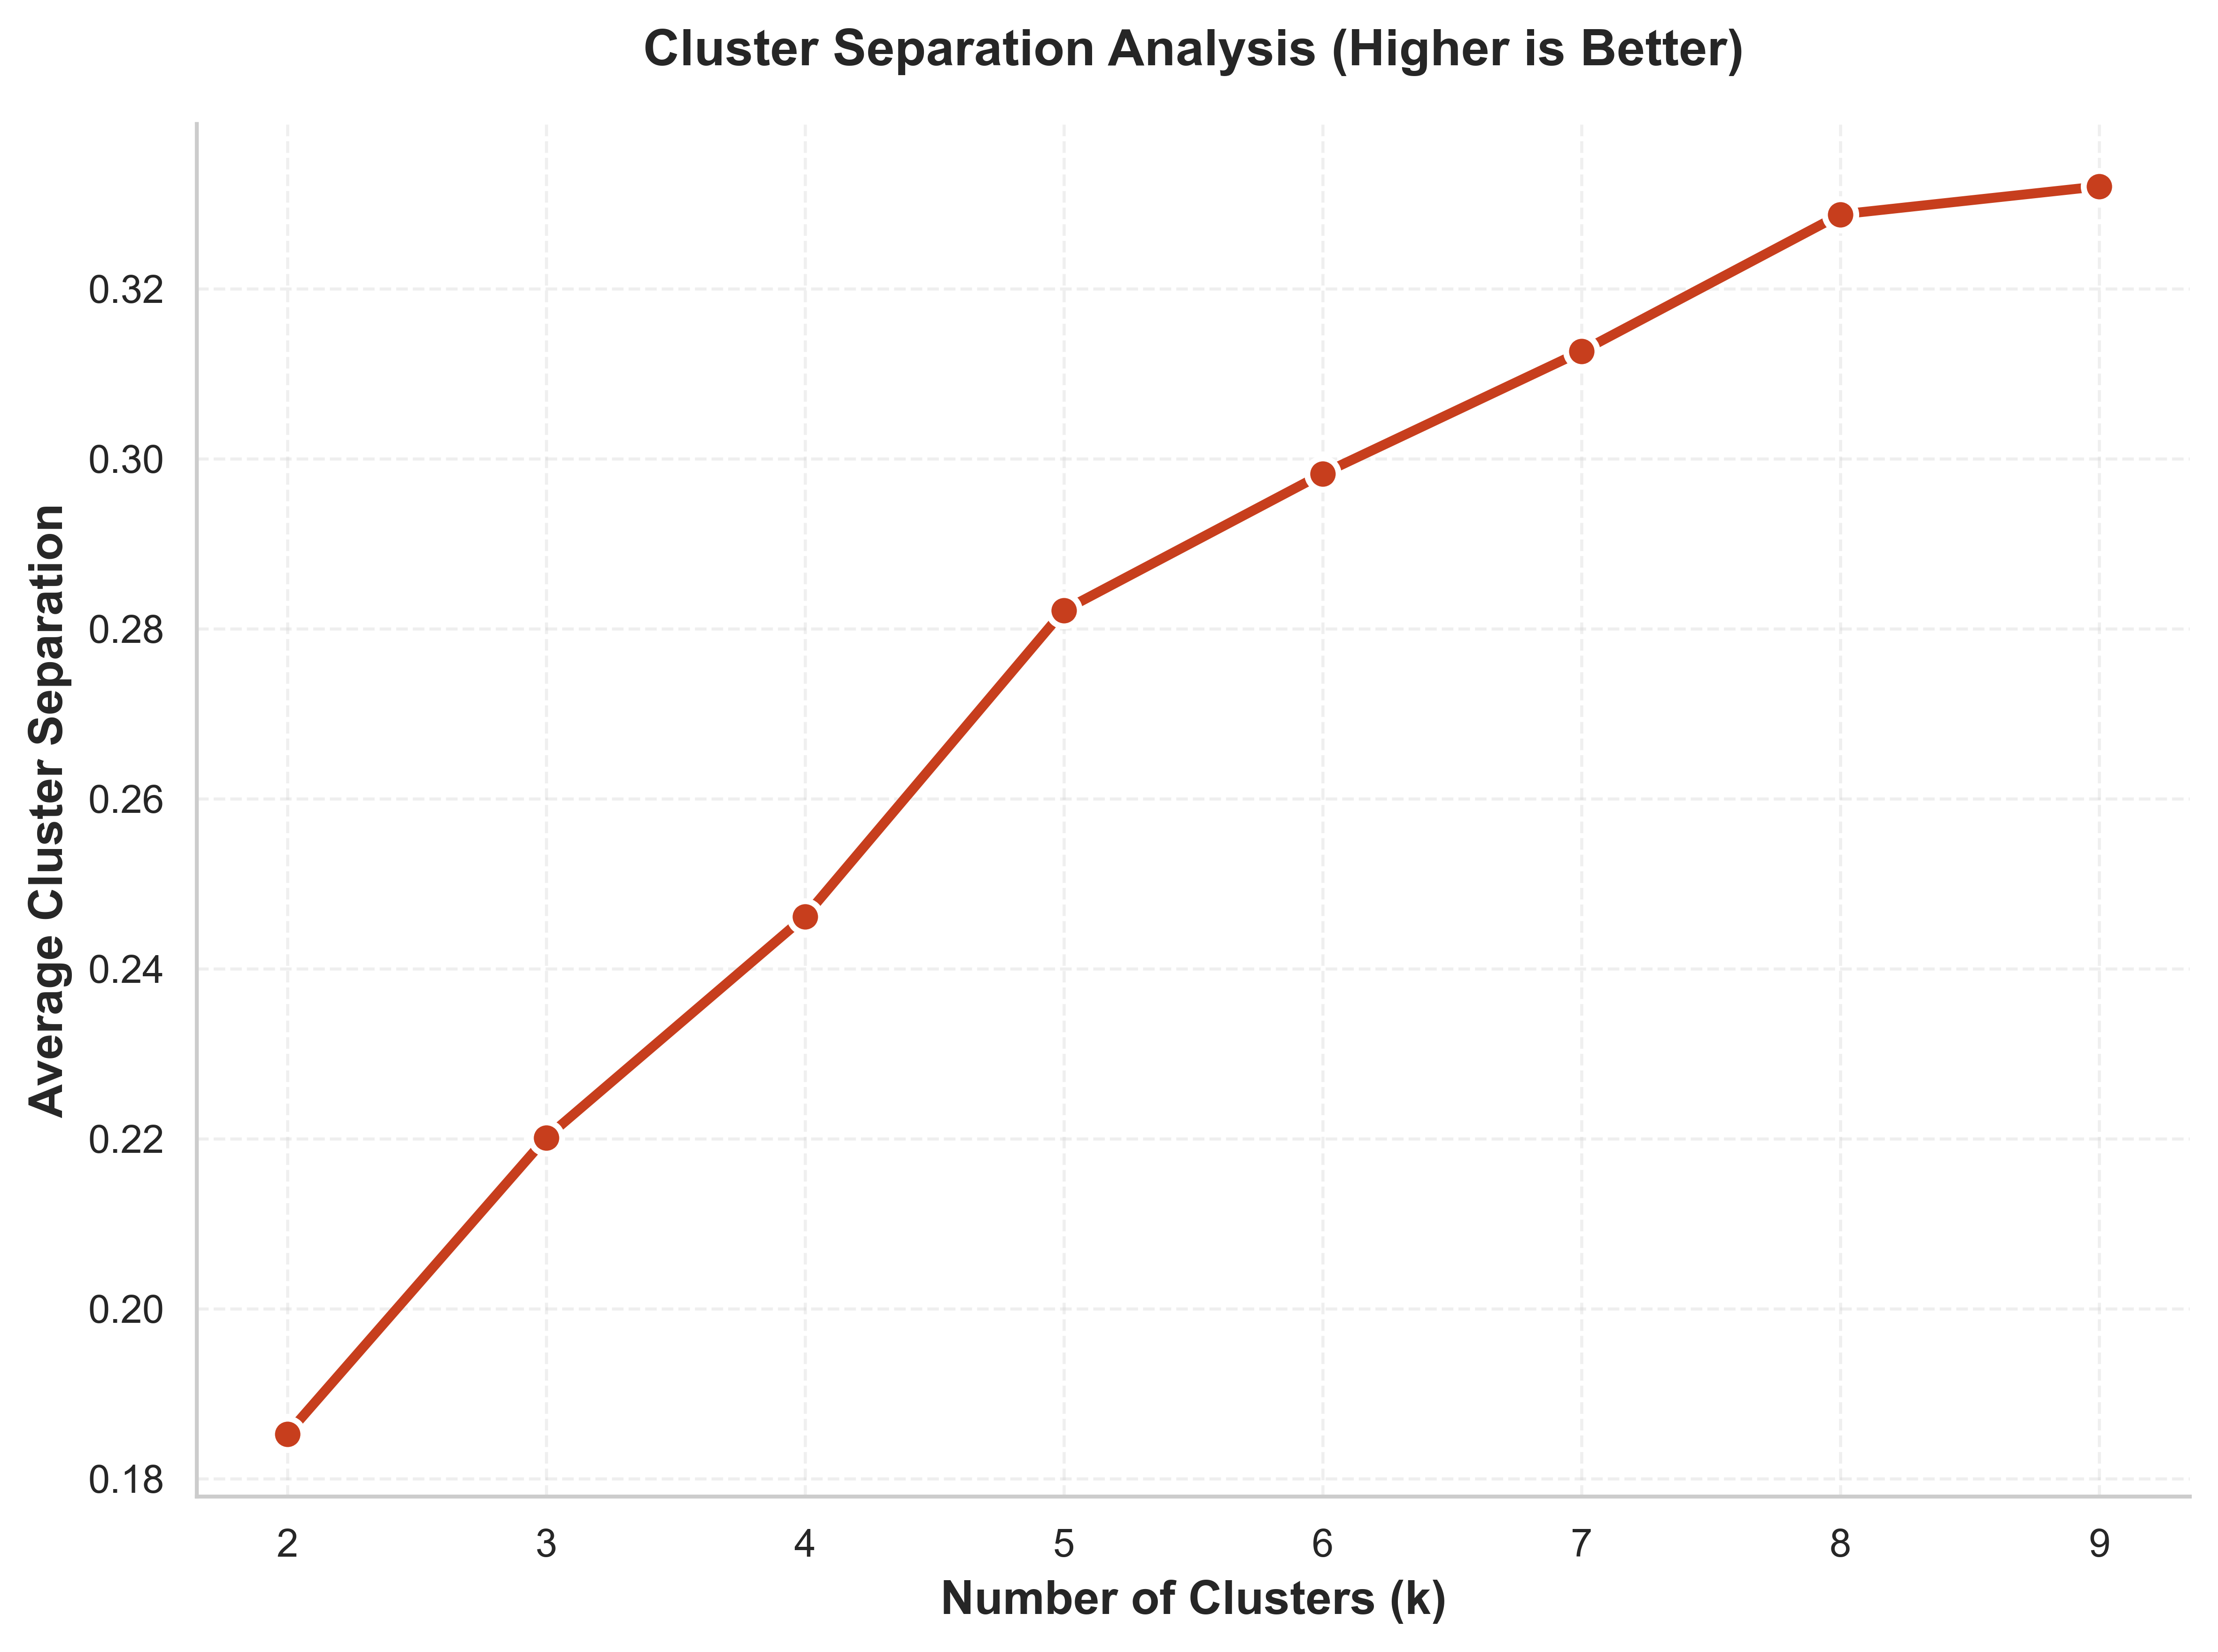

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data
ax.plot(df['k'], df['cluster_separation'], 'o-', 
        linewidth=2.5, markersize=8, color=colors['separation'],
        markeredgecolor='white', markeredgewidth=1.5)


# Styling
ax.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax.set_ylabel('Average Cluster Separation', fontweight='bold')
ax.set_title('Cluster Separation Analysis (Higher is Better)', fontweight='bold', pad=15)
ax.set_xticks(df['k'])
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### 4.5 Hierarchy Index

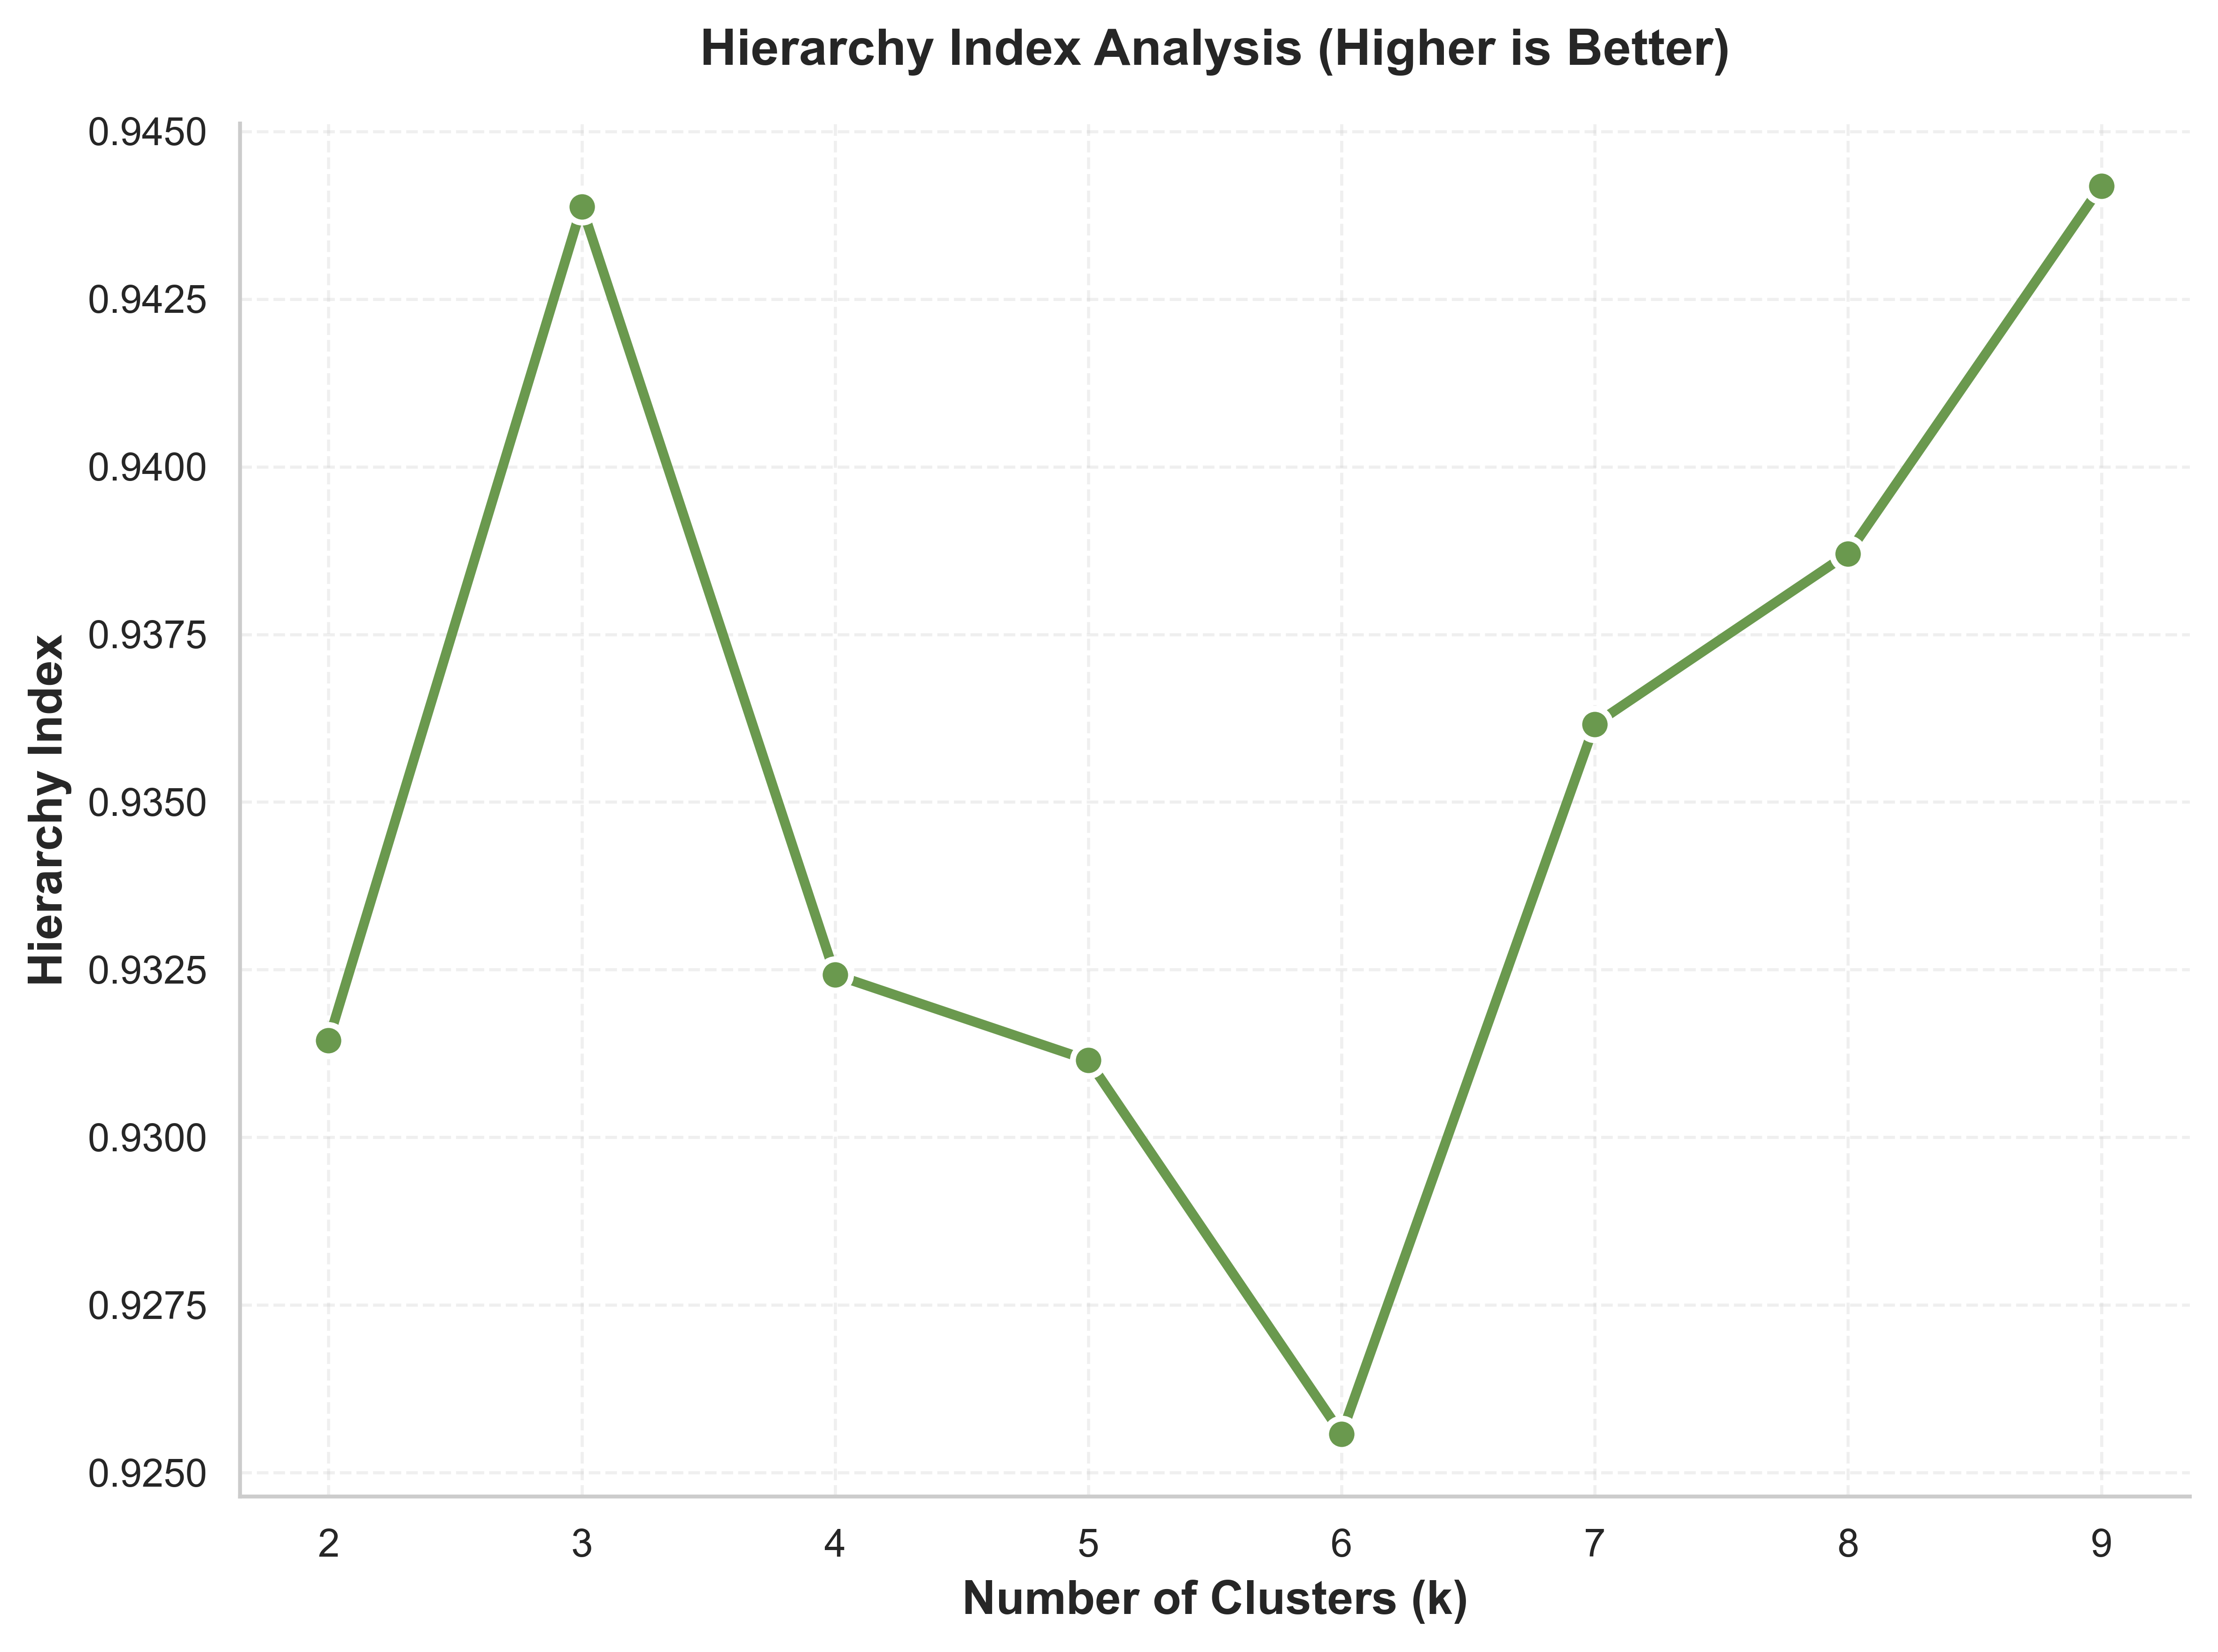

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data
ax.plot(df['k'], df['hierarchy_index'], 'o-', 
        linewidth=2.5, markersize=8, color=colors['hierarchy'],
        markeredgecolor='white', markeredgewidth=1.5)

# Styling
ax.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax.set_ylabel('Hierarchy Index', fontweight='bold')
ax.set_title('Hierarchy Index Analysis (Higher is Better)', fontweight='bold', pad=15)
ax.set_xticks(df['k'])
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## 5. Combined Multi-Panel Figure

Create a comprehensive figure with all metrics in one view.

/var/folders/sz/g28f2g250yl32c8l4vqp2n380000gn/T/ipykernel_36094/307842638.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


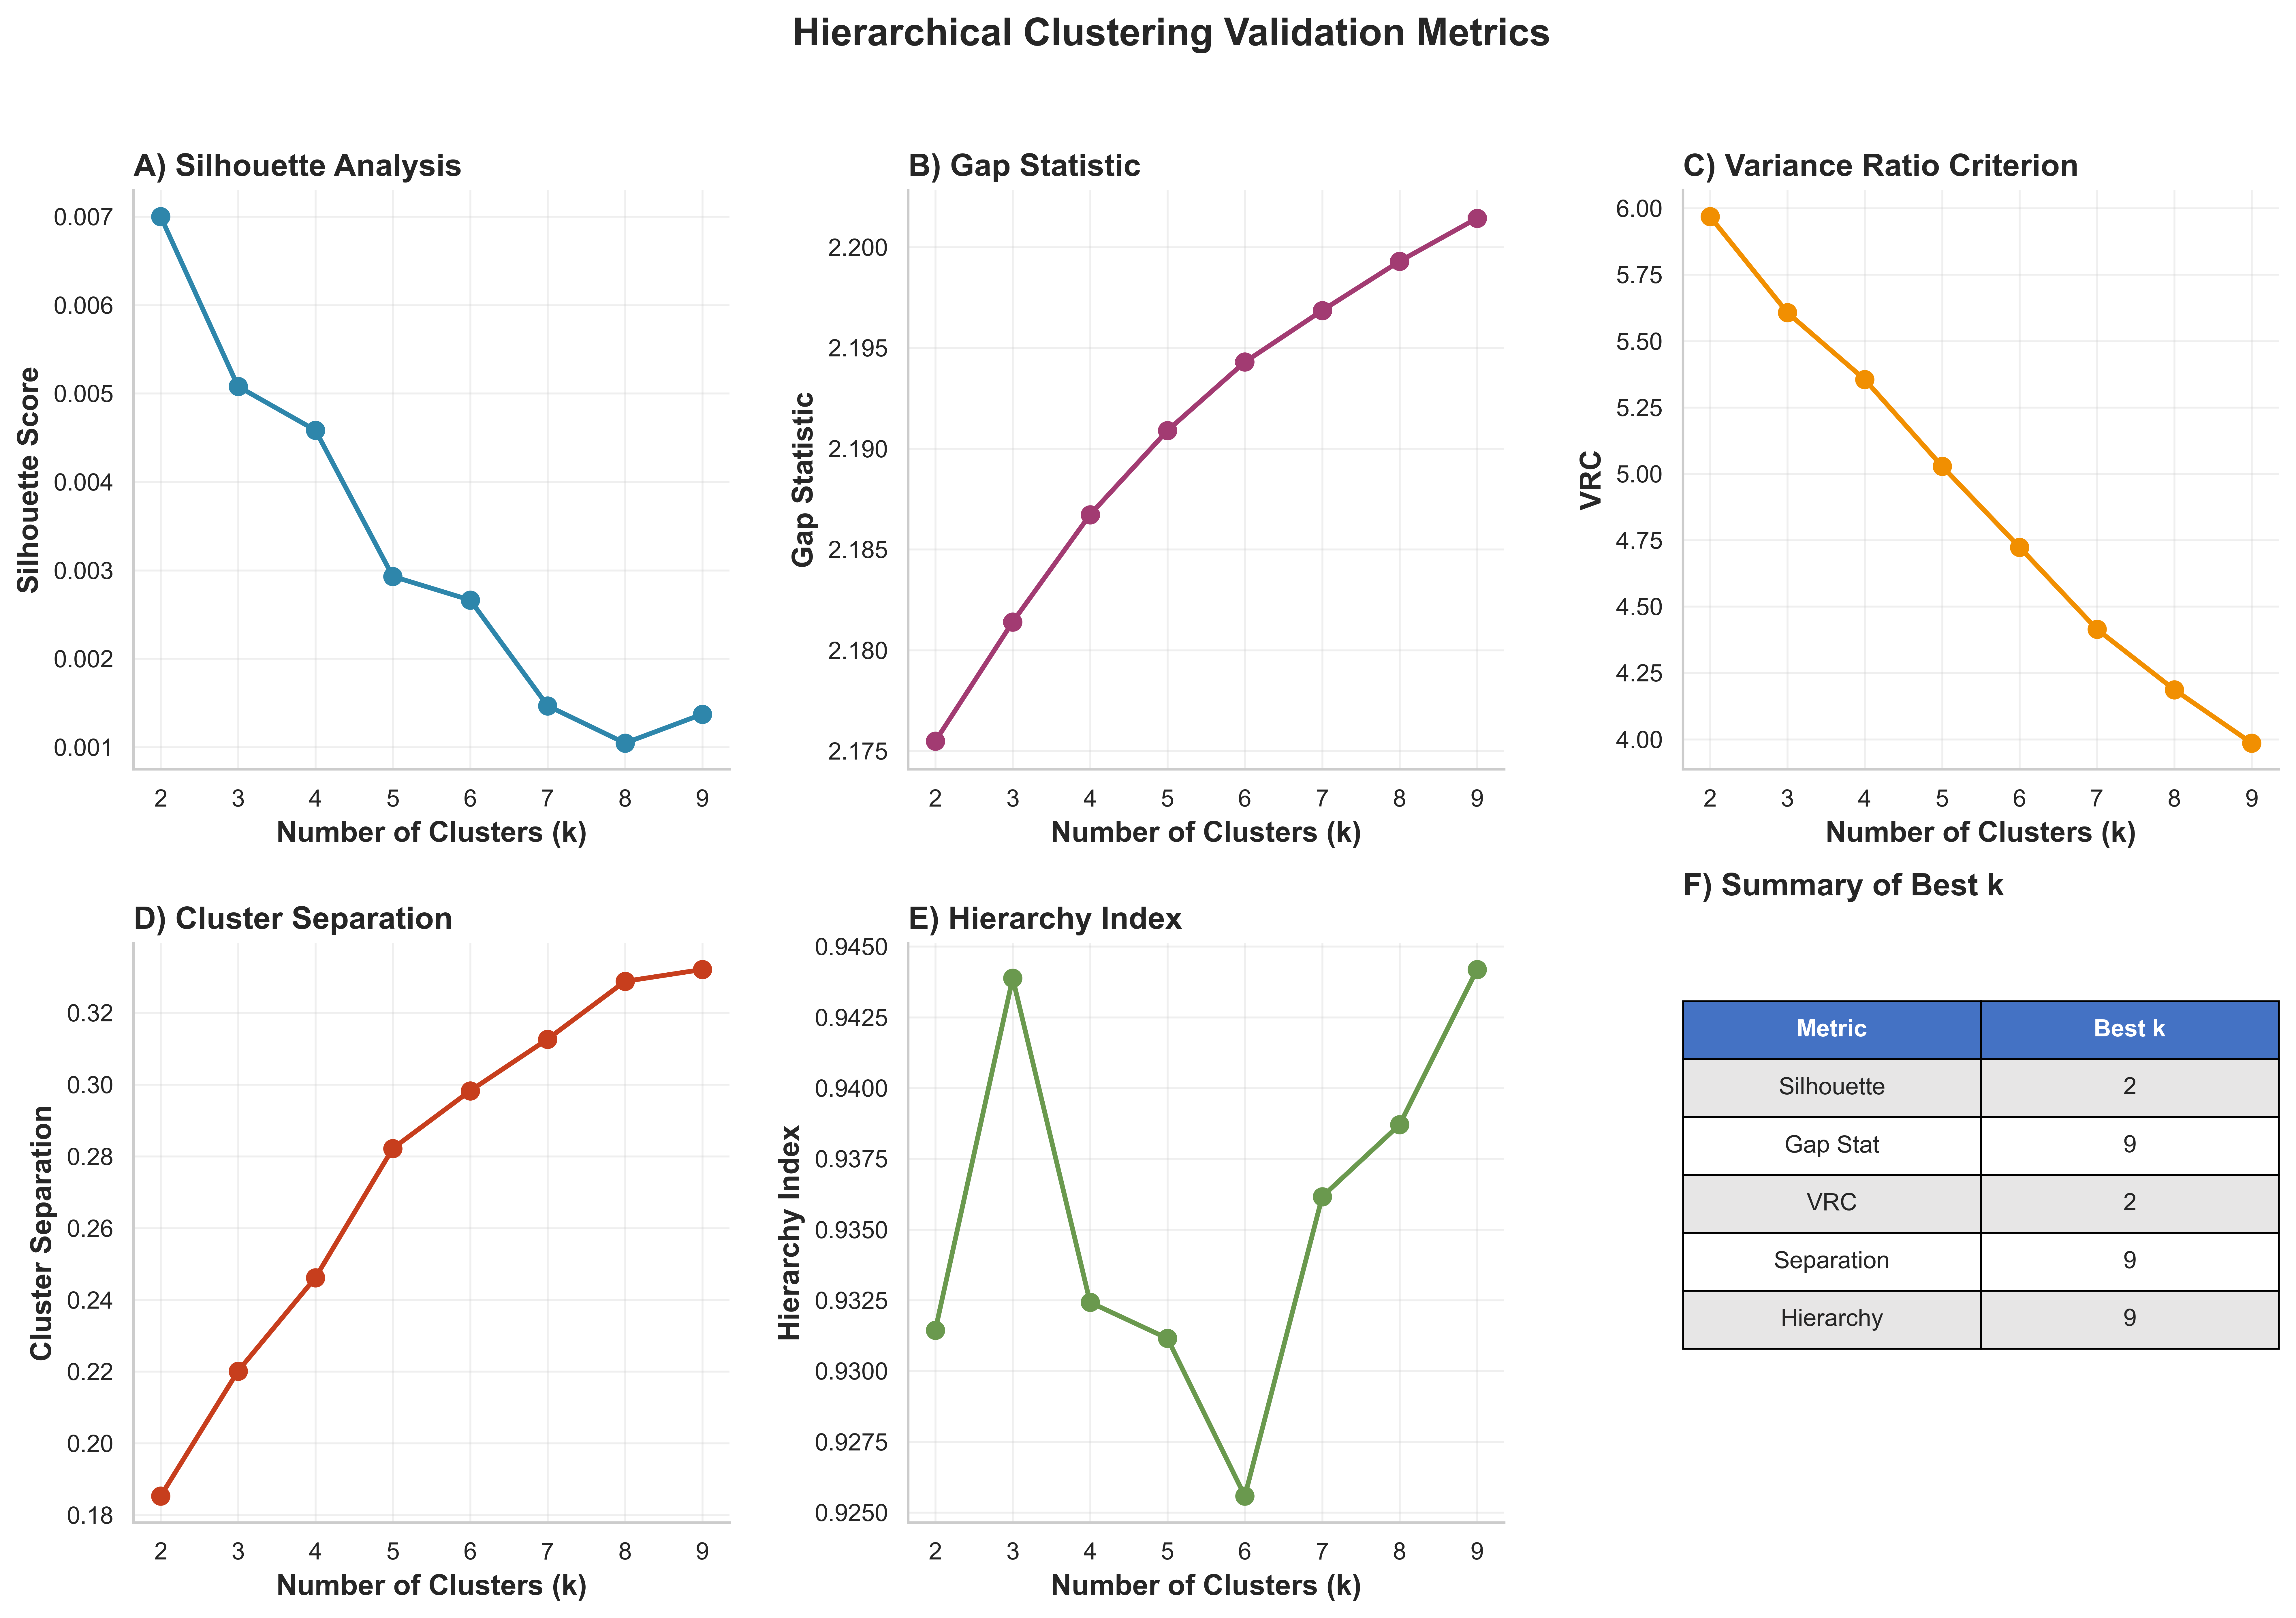

In [39]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Silhouette Score
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df['k'], df['silhouette_score'], 'o-', 
         linewidth=2, markersize=7, color=colors['silhouette'])
ax1.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax1.set_ylabel('Silhouette Score', fontweight='bold')
ax1.set_title('A) Silhouette Analysis', fontweight='bold', loc='left')
ax1.set_xticks(df['k'])
ax1.grid(True, alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 2. Gap Statistic
ax2 = fig.add_subplot(gs[0, 1])
ax2.errorbar(df['k'], df['gap_statistic'], yerr=df['gap_std'],
             fmt='o-', linewidth=2, markersize=7, 
             color=colors['gap'], capsize=4)
ax2.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax2.set_ylabel('Gap Statistic', fontweight='bold')
ax2.set_title('B) Gap Statistic', fontweight='bold', loc='left')
ax2.set_xticks(df['k'])
ax2.grid(True, alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# 3. VRC
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(df['k'], df['vrc'], 'o-', 
         linewidth=2, markersize=7, color=colors['vrc'])
ax3.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax3.set_ylabel('VRC', fontweight='bold')
ax3.set_title('C) Variance Ratio Criterion', fontweight='bold', loc='left')
ax3.set_xticks(df['k'])
ax3.grid(True, alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# 4. Cluster Separation
ax4 = fig.add_subplot(gs[1, 0])
ax4.plot(df['k'], df['cluster_separation'], 'o-', 
         linewidth=2, markersize=7, color=colors['separation'])
ax4.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax4.set_ylabel('Cluster Separation', fontweight='bold')
ax4.set_title('D) Cluster Separation', fontweight='bold', loc='left')
ax4.set_xticks(df['k'])
ax4.grid(True, alpha=0.3)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# 5. Hierarchy Index
ax5 = fig.add_subplot(gs[1, 1])
ax5.plot(df['k'], df['hierarchy_index'], 'o-', 
         linewidth=2, markersize=7, color=colors['hierarchy'])
ax5.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax5.set_ylabel('Hierarchy Index', fontweight='bold')
ax5.set_title('E) Hierarchy Index', fontweight='bold', loc='left')
ax5.set_xticks(df['k'])
ax5.grid(True, alpha=0.3)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

# 6. Summary table
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')

# Create summary of best k values
summary_data = {
    'Metric': ['Silhouette', 'Gap Stat', 'VRC', 'Separation', 'Hierarchy'],
    'Best k': [
        int(df.loc[df['silhouette_score'].idxmax(), 'k']),
        int(df.loc[df['gap_statistic'].idxmax(), 'k']),
        int(df.loc[df['vrc'].idxmax(), 'k']),
        int(df.loc[df['cluster_separation'].idxmax(), 'k']),
        int(df.loc[df['hierarchy_index'].idxmax(), 'k'])
    ]
}
summary_df = pd.DataFrame(summary_data)

table = ax6.table(cellText=summary_df.values,
                  colLabels=summary_df.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0.3, 1, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style table
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('#4472C4')
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor('#E7E6E6' if i % 2 else 'white')

ax6.set_title('F) Summary of Best k', fontweight='bold', loc='left', pad=20)

plt.suptitle('Hierarchical Clustering Validation Metrics', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

## 6. Save Figures

Export all figures in multiple formats for publication.

In [40]:
# Function to save individual plots
def save_metric_plot(metric_name, k_col, metric_col, color, ylabel, title):
    """Create and save a single metric plot"""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(df[k_col], df[metric_col], 'o-', 
            linewidth=2.5, markersize=8, color=color,
            markeredgecolor='white', markeredgewidth=1.5)
    
    # Find and mark best k
    best_k = df.loc[df[metric_col].idxmax(), k_col]
    best_score = df[metric_col].max()
    ax.axvline(best_k, color='red', linestyle='--', alpha=0.5, linewidth=2)
    ax.plot(best_k, best_score, 'r*', markersize=20, 
            markeredgecolor='darkred', markeredgewidth=1)
    
    ax.set_xlabel('Number of Clusters (k)', fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_title(title, fontweight='bold', pad=15)
    ax.set_xticks(df[k_col])
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save in multiple formats
    for ext in ['png', 'pdf', 'svg']:
        filepath = op.join(figures_dir, f'{metric_name}_validation.{ext}')
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved: {filepath}")
    
    plt.close()

# Save individual metric plots
print("Saving individual metric plots...")
save_metric_plot('silhouette', 'k', 'silhouette_score', colors['silhouette'], 
                 'Silhouette Score', 'Silhouette Analysis')

save_metric_plot('vrc', 'k', 'vrc', colors['vrc'], 
                 'Variance Ratio Criterion', 'VRC Analysis')

save_metric_plot('cluster_separation', 'k', 'cluster_separation', colors['separation'], 
                 'Average Cluster Separation', 'Cluster Separation Analysis')

save_metric_plot('hierarchy_index', 'k', 'hierarchy_index', colors['hierarchy'], 
                 'Hierarchy Index', 'Hierarchy Index Analysis')

print("\n✓ All figures saved successfully!")

Saving individual metric plots...
Saved: ./figures/silhouette_validation.png
Saved: ./figures/silhouette_validation.pdf
Saved: ./figures/silhouette_validation.svg
Saved: ./figures/vrc_validation.png
Saved: ./figures/vrc_validation.pdf
Saved: ./figures/vrc_validation.svg
Saved: ./figures/cluster_separation_validation.png
Saved: ./figures/cluster_separation_validation.pdf
Saved: ./figures/cluster_separation_validation.svg
Saved: ./figures/hierarchy_index_validation.png
Saved: ./figures/hierarchy_index_validation.pdf
Saved: ./figures/hierarchy_index_validation.svg

✓ All figures saved successfully!
